In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data=[[3,1.5,1],
           [2,1,0],
           [4,1.5,1],
           [3,1,0],
           [3.5,0.5,1],
           [2,0.5,0],
           [5.5,1,1],
           [1,1,0]]
mystery_flower=[4.5,1]

In [3]:
def sigmoid(X):
        return 1/(1+np.exp(-X))
def sigmoid_P(x):
        return sigmoid (x)*(1-sigmoid(x))

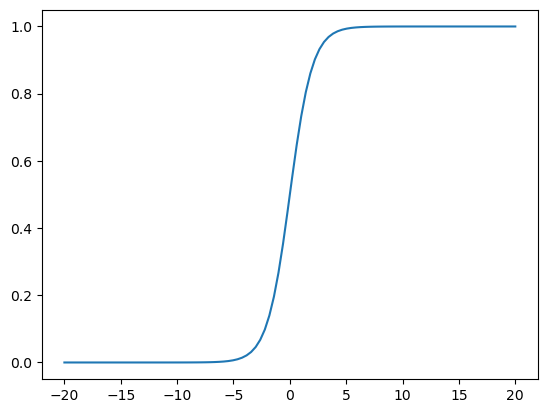

In [4]:
T=np.linspace(-20,20,100)
Y=sigmoid(T)
plt.plot(T,Y)

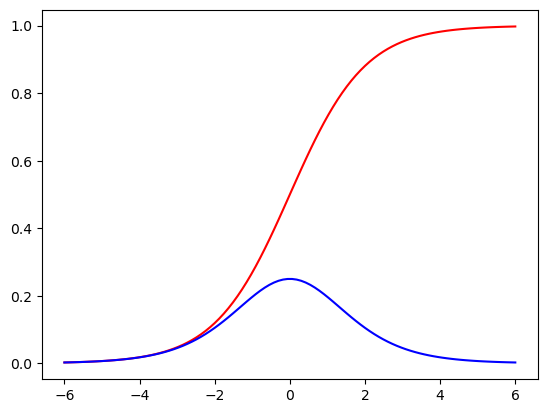

In [5]:
T=np.linspace(-6,6,100)
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_P(T), c='b')

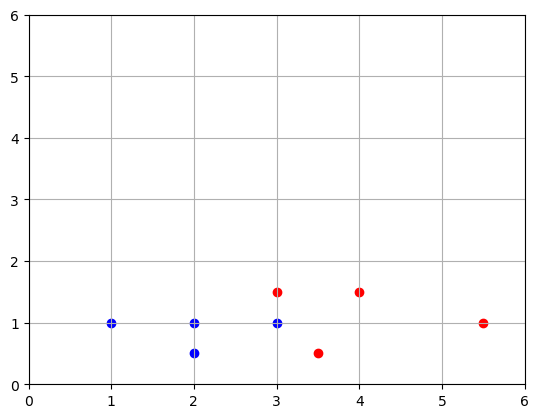

In [6]:
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
        point=data[i]
        color="r"
        if point[2]==0:
              color="b"
        plt.scatter(point[0], point[1],c=color)

In [11]:
learning_rate=0.3
costs=[]
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()

In [31]:
for i in range(100000):
        ri=np.random.randint(len(data))
        point=data[ri]
        z=point[0]*w1+point[1]*w2+b
        pred=sigmoid(z)
        target=point[2]
        cost=np.square(pred-target)

In [30]:
dcost_pred=2*(pred-target)
dpred_dz=sigmoid_P(z)*(1-sigmoid(z))
dz_dw1=point[0]
dz_dw2=point[1]
dz_db=1
dcost_dz=dcost_pred*dpred_dz
dcost_dw1=dcost_dz*dz_dw1
dcost_dw2=dcost_dz*dz_dw2
dcost_db=dcost_dz*dz_db
w1=w1-learning_rate*dcost_dw1
w2=w2-learning_rate*dcost_dw2
b=b-learning_rate*dcost_db

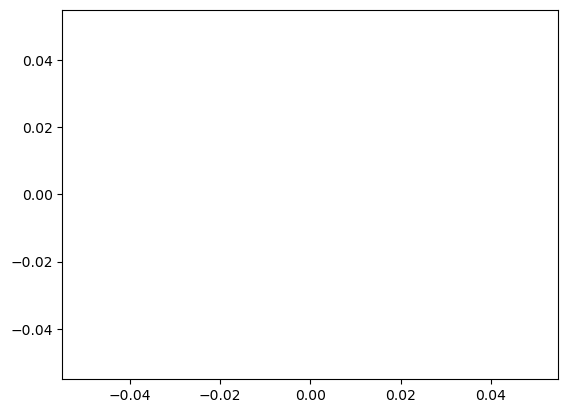

In [39]:
if i % 100==0:
       cost_sum=0
       for j in range(len(data)):
             point=data[ri]
             z=point[0]*w1+point[1]*w2+b
             pred=sigmoid(z)
             target=point[2]
             cost_sum +=np.square(pred-target)
       costs.append(cost_sum/len(data))
plt.plot(costs)

In [40]:
w1

0.33362211098546496

In [37]:
w2

0.04632758593037519

In [38]:
b

-1.5822370418237992

In [22]:
for i in range(len(data)):
      point=data[i]
      print(point)
      z=point[0]*w1+point[1]*w2+b
      pred=sigmoid(z)
      print("pred:{}".format(pred))

[3, 1.5, 1]
pred:0.31226700327820417
[2, 1, 0]
pred:0.2552886599261897
[4, 1.5, 1]
pred:0.3760368661683685
[3, 1, 0]
pred:0.3127134999649086
[3.5, 0.5, 1]
pred:0.3443843161511312
[2, 0.5, 0]
pred:0.25568397486334177
[5.5, 1, 1]
pred:0.4801057929635789
[1, 1, 0]
pred:0.2052596407433779


In [23]:
z=mystery_flower[0]*w1+mystery_flower[1]*w2+b
pred=sigmoid(z)
pred

0.41029237769026183

In [26]:
def which_flower(length, width):
       z=length*w1+width*w2+b
       print(z)
       pred=sigmoid(z)
       if pred<0.5:
          print("blue")
       else:
          print("red")

In [27]:
which_flower(0.5,1)

-1.4953087389915023
blue


In [28]:
which_flower(4.5,1)

-0.36275683679493964
blue


In [41]:
import os

In [42]:
from gtts import gTTS
tts=gTTS(text='紅色',lang='zh-TW')
tts.save('red.mp3')

tts=gTTS(text='藍色', lang='zh-TW')
tts.save('blue.mp3')

In [43]:
def which_flower(length, width):
       z=length*w1+width*w2+b
       print(z)
       pred=sigmoid(z)

       if pred < 0.5:
             os . system("blue.mp3")
       else:
             os . system("red.mp3")

In [44]:
which_flower(4.5, 1)

-0.0346099564588318


In [45]:
which_flower(0.4,  2)

-1.3561330255688628
